In [1]:
import pubchempy as pcp
from rdkit import Chem
from rdkit.Chem import rdchem, Draw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating RDKit Molecules
The aim here is to get the PubChem CID for the compunds using the get_compounds function so that we can be able to utilize the isomeric_smiles function from pubchempy library that will allow us to get the smiles of each compound

In [25]:
# Getting the SMILES of each compound from pubchempy
propane = pcp.get_compounds("Propane", "name") #Getting the CID of propane from the pubchem database using the name identifier type
# print(propane)
propane_smiles = propane[0].isomeric_smiles #Accessing the smiles of propane
print(f"SMILES for Propane : {propane_smiles}")

ethene = pcp.get_compounds("Ethene", "name")
ethene_smiles = ethene[0].isomeric_smiles
print(f"SMILES for Ethene : {ethene_smiles}")

cyclohexane = pcp.get_compounds("Cyclohexane", "name")
cyclohexane_smiles = cyclohexane[0].isomeric_smiles
print(f"SMILES for Cyclohexane : {cyclohexane_smiles}")

buckminsterfullerene = pcp.get_compounds("Buckminsterfullerene", "name")
buckminsterfullerene_smiles = buckminsterfullerene[0].isomeric_smiles
print(f"SMILES for Buckminsterfullerene : {buckminsterfullerene_smiles}")

SMILES for Propane : CCC
SMILES for Ethene : C=C
SMILES for Cyclohexane : C1CCCCC1
SMILES for Buckminsterfullerene : C12=C3C4=C5C6=C1C7=C8C9=C1C%10=C%11C(=C29)C3=C2C3=C4C4=C5C5=C9C6=C7C6=C7C8=C1C1=C8C%10=C%10C%11=C2C2=C3C3=C4C4=C5C5=C%11C%12=C(C6=C95)C7=C1C1=C%12C5=C%11C4=C3C3=C5C(=C81)C%10=C23


Now that we have the SMILES for each compound in question, we will convert those SMILES to RDKit molecules.

In [33]:
#Using the MolFromSmiles function that was imported from the Chem class that was imported from the RDKit library to convert the SMILES to RDKit molecules
propane_mol = Chem.MolFromSmiles(propane_smiles)
ethene_mol = Chem.MolFromSmiles(ethene_smiles)
cyclohexane_mol = Chem.MolFromSmiles(cyclohexane_smiles)
buckminsterfullerene_mol = Chem.MolFromSmiles(buckminsterfullerene_smiles)

# Determining the number of atoms for each molecule

In [41]:
print("Number of atoms in Propane molecules :",propane_mol.GetNumAtoms())
print("Number of atoms in Ethene molecules :",ethene_mol.GetNumAtoms())
print("Number of atoms in Cyclohexane molecules :",cyclohexane_mol.GetNumAtoms())
print("Number of atoms in Buckminsterfullerene molecules :",buckminsterfullerene_mol.GetNumAtoms())

Number of atoms in Propane molecules : 3
Number of atoms in Ethene molecules : 2
Number of atoms in Cyclohexane molecules : 6
Number of atoms in Buckminsterfullerene molecules : 60


# Chemical symbol and atomic weight of each atom in the molecules

In [57]:

propane_atoms = propane_mol.GetAtoms() # Getting the atoms of our molecule.

for x in propane_atoms: #Looping through the atoms so that we can tap into the symbol of the atoms using the GetSymbol() method.
    prop_chem_symbol = x.GetSymbol() #Getting the symbol of of the atom
    prop_atomic_weight = rdchem.GetPeriodicTable().GetAtomicWeight(prop_chem_symbol) #For atomic symbol via the Periodic table

print("----------------------Propane-------------------------------------------------------------------------------------------------------------")
print()
print("Chemical symbol for Propane is :",prop_chem_symbol)
print("Atomic weight for Propane is :",prop_atomic_weight*propane_mol.GetNumAtoms()) #Printing the atomic weight of the atoms
print()
print("------------------------------------------------------------------------------------------------------------------------------------------")

ethene_atoms = ethene_mol.GetAtoms()
for y in ethene_atoms:
    ethene_chem_symbol = y.GetSymbol()
    ethene_atomic_weight = rdchem.GetPeriodicTable().GetAtomicWeight(ethene_chem_symbol)
    
print()
print("----------------------Ethene--------------------------------------------------------------------------------------------------------------")
print()
print("Chemical symbol for Ethene is :",ethene_chem_symbol)
print("Atomic weight for Ethene is :",ethene_atomic_weight*ethene_mol.GetNumAtoms())
print()
print("------------------------------------------------------------------------------------------------------------------------------------------")

cyclohexane_atoms = cyclohexane_mol.GetAtoms()
for i in cyclohexane_atoms:
    cycl_chem_symbol = i.GetSymbol()
    cycl_atomic_weight = rdchem.GetPeriodicTable().GetAtomicWeight(cycl_chem_symbol)
    
print()
print("----------------------Cyclohexane---------------------------------------------------------------------------------------------------------")
print()
print("Chemical symbol for Cyclohexane is :",cycl_chem_symbol)
print("Atomic weight for Cyclohexane is :",cycl_atomic_weight*cyclohexane_mol.GetNumAtoms())
print()
print("-------------------------------------------------------------------------------------------------------------------------------------------")

buckminsterfullerene_atoms = buckminsterfullerene_mol.GetAtoms()
for j in buckminsterfullerene_atoms:
    buck_chem_symbol = j.GetSymbol()
    buck_atomic_weight = rdchem.GetPeriodicTable().GetAtomicWeight(buck_chem_symbol)
    
print()
print("----------------------Buckminsterfullerene-------------------------------------------------------------------------------------------------")
print()
print("Chemical symbol for Buckminsterfullerene is :",buck_chem_symbol)
print("Atomic weight for Buckminsterfullerene is :",buck_atomic_weight*buckminsterfullerene_mol.GetNumAtoms())
print()
print("-------------------------------------------------------------------------------------------------------------------------------------------")

----------------------Propane-------------------------------------------------------------------------------------------------------------

Chemical symbol for Propane is : C
Atomic weight for Propane is : 36.033

------------------------------------------------------------------------------------------------------------------------------------------

----------------------Ethene--------------------------------------------------------------------------------------------------------------

Chemical symbol for Ethene is : C
Atomic weight for Ethene is : 24.022

------------------------------------------------------------------------------------------------------------------------------------------

----------------------Cyclohexane---------------------------------------------------------------------------------------------------------

Chemical symbol for Cyclohexane is : C
Atomic weight for Cyclohexane is : 72.066

------------------------------------------------------------------------

# Number of aromatic bonds
My approach here was to get the bonds of each molecule then do a for loop in those bonds to check which of them are Aromatic

In [59]:
#Propane
prop_num_bonds = propane_mol.GetBonds() #Getting the list of bonds
# type(prop_num_bonds)
prop_count = 0

for prop_aromatic in prop_num_bonds:
    if prop_aromatic == prop_aromatic.GetIsAromatic():
        prop_count += 1
print("Propane aromatic bonds :",prop_count)

#Ethene
ethe_num_bonds = ethene_mol.GetBonds()
ethe_count = 0

for ethe_aromatic in ethe_num_bonds:
    if ethe_aromatic == ethe_aromatic.GetIsAromatic():
        ethe_count += 1
print("Ethene aromatic bonds :",ethe_count)

#Cyclohexane
cycl_num_bonds = cyclohexane_mol.GetBonds()
cycl_count = 0

for cycl_aromatic in cycl_num_bonds:
    if cycl_aromatic == cycl_aromatic.GetIsAromatic():
        cycl_count += 1
print("Cyclohexane aromatic bonds :",cycl_count)

#Buckminsterfullerene
buck_num_bonds = cyclohexane_mol.GetBonds()
buck_count = 0

for buck_aromatic in buck_num_bonds:
    if buck_aromatic == buck_aromatic.GetIsAromatic():
        buck_count += 1
    # print(buck_aromatic == buck_aromatic.GetIsAromatic()) #Returns False in all iterations of bonds
print("Buckminsterfullerene aromatic bonds :",buck_count)

Propane aromatic bonds : 0
Ethene aromatic bonds : 0
Cyclohexane aromatic bonds : 0
Buckminsterfullerene aromatic bonds : 0


# Drawing Molecules from the Delaney dataset

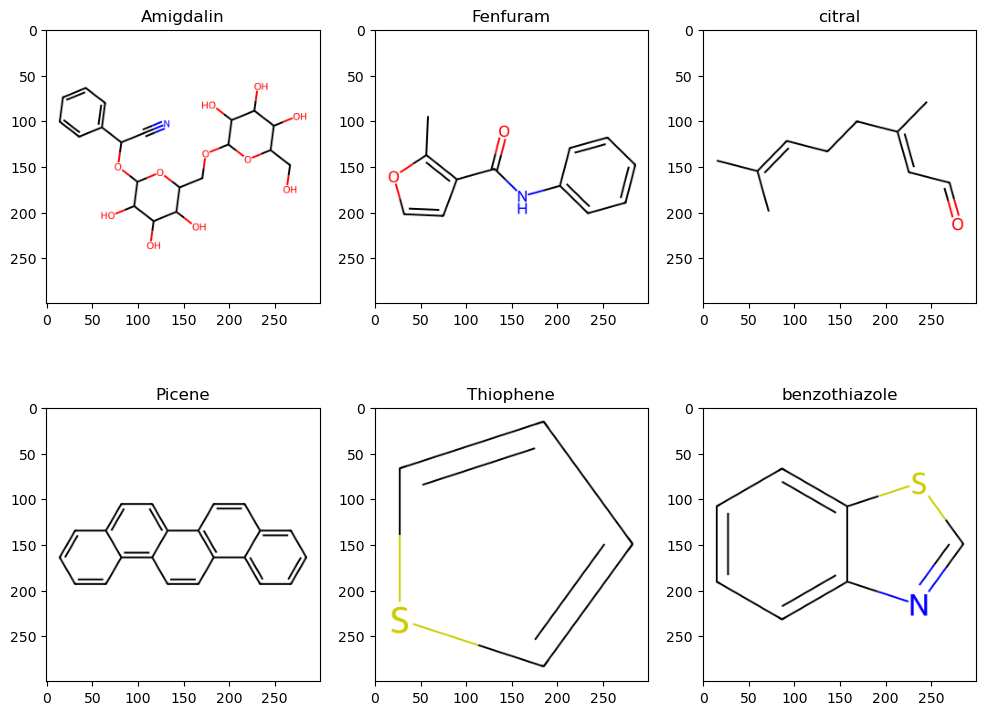

In [114]:
df = pd.read_csv("solubility.csv") #Reading the file
# df.head(6)
# print(df["smiles"])
delaney_smiles = np.asarray(df["smiles"]) #Converting our smiles from the delaney dataset to be in an array so that I can access them via indexes
delaney_compound_ids = np.asarray(df["Compound ID"]) #Same applies to the Compound IDs as well
# print(delaney_compound_ids)
# print(delaney_smiles)

num_rows = 2 #Number of rows for the grid
num_cols = 3 #Number of columns for the grid

# Create a figure with subplots in a grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 9))
axs = axs.flatten()  # Flatten the 2D array of axes

for x in range(6):
    # print(delaney_smiles[x])
    # print("-------------------------------------------------------------------------------------------------------------------------------------------")
    molecules = Chem.MolFromSmiles(delaney_smiles[x])
    # print(delaney_compound_ids[x])
    drawings = Draw.MolToImage(molecules)
    axs[x].imshow(drawings)
    axs[x].set_title(delaney_compound_ids[x])
    # axs[x].axis("Off")
    # display(drawings)
    

# Challenges
1. I initially thought the atomic weights are the same for all molecules until I read that we have to multiply the weight we are getting for Carbon by the number of atoms of a molecule. In this projects, hydrogen atoms are ignored.
   
2. Atomic weight for the GetAtomicWeight() function returns different weights from that of MolWt() function, these two functions confused me a bit, the objective of this task was to get the atomic weight of atoms, meaning we are working with GetAtomicWeight() and not MolWt(). If the question was based on the atomic weight of the whole Molecule, the MolWt() would be better.

# Potential Improvements
1. My variable naming was not consistent enough but they do make sense
   
2. I did a lot of code repition for functionality of each molecule, I believe there is a way to achieve all that I did but with less code.